In [70]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
from itertools import zip_longest

In [71]:
df = pd.read_csv("../datasets/raw/CreditCard.csv")

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

- CLIENTNUM → Likely a unique customer ID. Not useful as a feature for modeling; mainly for reference.
- Attrition_Flag → Target variable (whether the customer churned or not).
- Customer_Age, Gender, Dependent_count, Education_Level, Marital_Status, Income_Category, Card_Category → Demographic features.

- Months_on_book: Number of months the customer has had an account.

- Total_Relationship_Count: Number of products/services the customer uses.

- Months_Inactive_12_mon: Months the customer was inactive in the past year.

- Contacts_Count_12_mon: Number of times the customer was contacted (calls/emails) in the past year.

- Credit_Limit: Maximum credit available on the customer’s card.

- Total_Revolving_Bal: Balance carried over month to month.

- Avg_Open_To_Buy: Average available credit (Credit_Limit minus balance).

- Total_Amt_Chng_Q4_Q1: Change ratio in total transaction amount from Q1 to Q4.

- Total_Trans_Amt: Total amount transacted by the customer.

- Total_Trans_Ct: Total number of transactions made.

- Total_Ct_Chng_Q4_Q1: Change ratio in total transaction count from Q1 to Q4.

- Avg_Utilization_Ratio: Average percentage of credit limit used.


- Unnamed: 21: Empty column can be dropped.

In [73]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Unnamed: 21
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,0.0
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,NaN
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,NaN
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,NaN
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,NaN
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,NaN
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,NaN
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,NaN


In [74]:
df.head().T

,0,1,2,3,4
CLIENTNUM,768805383,818770008,713982108,769911858,709106358
Attrition_Flag,Existing Customer,Existing Customer,Existing Customer,Existing Customer,Existing Customer
Customer_Age,45,49,51,40,40
Gender,M,F,M,F,M
Dependent_count,3,5,3,4,3
Education_Level,High School,Graduate,Graduate,High School,Uneducated
Marital_Status,Married,Single,Married,Unknown,Married
Income_Category,$60K - $80K,Less than $40K,$80K - $120K,Less than $40K,$60K - $80K
Card_Category,Blue,Blue,Blue,Blue,Blue
Months_on_book,39,44,36,34,21


## Null and duplicates

In [75]:
print(df.isnull().sum())

CLIENTNUM                       0
Attrition_Flag                  0
Customer_Age                    0
Gender                          0
Dependent_count                 0
Education_Level                 0
Marital_Status                  0
Income_Category                 0
Card_Category                   0
Months_on_book                  0
Total_Relationship_Count        0
Months_Inactive_12_mon          0
Contacts_Count_12_mon           0
Credit_Limit                    0
Total_Revolving_Bal             0
Avg_Open_To_Buy                 0
Total_Amt_Chng_Q4_Q1            0
Total_Trans_Amt                 0
Total_Trans_Ct                  0
Total_Ct_Chng_Q4_Q1             0
Avg_Utilization_Ratio           0
Unnamed: 21                 10127
dtype: int64


<Axes: >

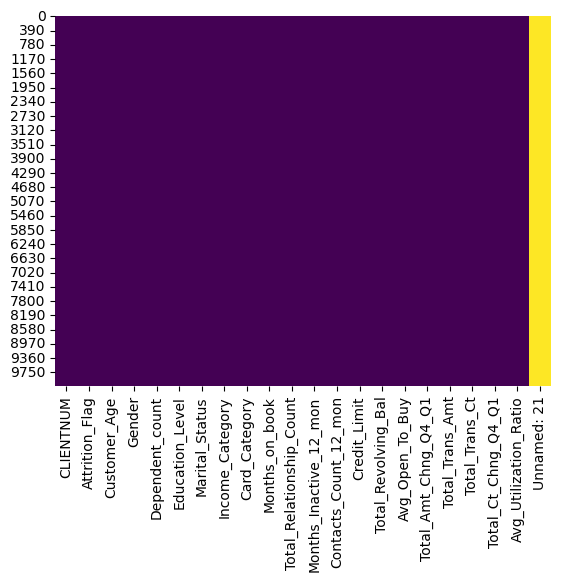

In [76]:
sns.heatmap(df.isnull(),cbar=False ,cmap='viridis')

In [77]:
df.duplicated().sum()

np.int64(0)

### Cheking Values

In [78]:
ranges = {
    "Customer_Age": (18, 100),
    "Dependent_count": (0, 10),
    "Months_on_book": (0, 240),
    "Total_Relationship_Count": (1, 10),
    "Months_Inactive_12_mon": (0, 12),
    "Contacts_Count_12_mon": (0, 20),
    "Credit_Limit": (100, 100000),
    "Total_Revolving_Bal": (0, 100000),
    "Avg_Open_To_Buy": (0, 100000),
    "Total_Amt_Chng_Q4_Q1": (0, 5),
    "Total_Trans_Amt": (0, 200000),
    "Total_Trans_Ct": (0, 500),
    "Total_Ct_Chng_Q4_Q1": (0, 5),
    "Avg_Utilization_Ratio": (0, 1)
}
print("\n🔢 Checking numerical values range...\n")
for col, (low, high) in ranges.items():
    if col in df.columns:
        outliers = df[(df[col] < low) | (df[col] > high)][col]
        if not outliers.empty:
            print(f"{col} out of range values:\n{outliers.unique()}\n")
        else:
            print(f"{col} is 🆗")



🔢 Checking numerical values range...

Customer_Age is 🆗
Dependent_count is 🆗
Months_on_book is 🆗
Total_Relationship_Count is 🆗
Months_Inactive_12_mon is 🆗
Contacts_Count_12_mon is 🆗
Credit_Limit is 🆗
Total_Revolving_Bal is 🆗
Avg_Open_To_Buy is 🆗
Total_Amt_Chng_Q4_Q1 is 🆗
Total_Trans_Amt is 🆗
Total_Trans_Ct is 🆗
Total_Ct_Chng_Q4_Q1 is 🆗
Avg_Utilization_Ratio is 🆗


In [79]:
categories = {
    "Gender": ["M", "F"],
    "Education_Level": ["Uneducated","High School","College","Graduate","Post-Graduate","Doctorate","Unknown"],
    "Marital_Status": ["Single","Married","Divorced","Unknown"],
    "Income_Category": ["Less than $40K","$40K - $60K","$60K - $80K","$80K - $120K","$120K +","Unknown"],
    "Card_Category": ["Blue","Silver","Gold","Platinum"]
}

print("\n🔤 Checking categorical values...\n")
for col, allowed in categories.items():
    if col in df.columns:
        invalid = df[~df[col].isin(allowed)][col]
        if not invalid.empty:
            print(f"{col} Invalid categories:\n{invalid.value_counts()}\n")
        else:
            print(f"{col}: all categories 🆗")


🔤 Checking categorical values...

Gender: all categories 🆗
Education_Level: all categories 🆗
Marital_Status: all categories 🆗
Income_Category: all categories 🆗
Card_Category: all categories 🆗


## cleaning

In [80]:
df = df.rename(columns={'Attrition_Flag': 'Churn'})
df = df.rename(columns={'CLIENTNUM' : 'IDs'})

In [81]:
df = df.drop(columns=['Unnamed: 21'])

In [82]:
df.columns

Index(['IDs', 'Churn', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [83]:
df['Churn'].value_counts()

Churn
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

In [84]:
df['Churn'] = df['Churn'].map({'Existing Customer': 0 ,'Attrited Customer' : 1})

## EDA

In [85]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(exclude=['object']).columns.tolist()

table = list(zip_longest(num_cols,cat_cols,fillvalue=''))
print(tabulate(table,headers=['Numerical','Categorical'] , tablefmt='fancy_drid'))

Numerical                 Categorical
------------------------  ---------------
IDs                       Gender
Churn                     Education_Level
Customer_Age              Marital_Status
Dependent_count           Income_Category
Months_on_book            Card_Category
Total_Relationship_Count
Months_Inactive_12_mon
Contacts_Count_12_mon
Credit_Limit
Total_Revolving_Bal
Avg_Open_To_Buy
Total_Amt_Chng_Q4_Q1
Total_Trans_Amt
Total_Trans_Ct
Total_Ct_Chng_Q4_Q1
Avg_Utilization_Ratio


In [86]:
df[df.Churn == 1].describe(include=['object'])

,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,1627,1627,1627,1627,1627
unique,2,7,4,6,4
top,F,Graduate,Married,Less than $40K,Blue
freq,930,487,709,612,1519


In [87]:
df[df.Churn == 0].describe(include=['object'])

,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,8500,8500,8500,8500,8500
unique,2,7,4,6,4
top,F,Graduate,Married,Less than $40K,Blue
freq,4428,2641,3978,2949,7917


### Univariate EDA Plots

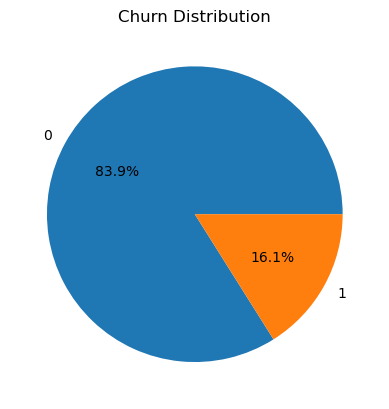

In [88]:
target_counts = df['Churn'].value_counts()
plt.pie(target_counts,labels=target_counts.index,autopct='%1.1f%%')
plt.title('Churn Distribution')
plt.show()

83.9% are Existing Customers (retained).
16.1% are Attrited Customers (have left).

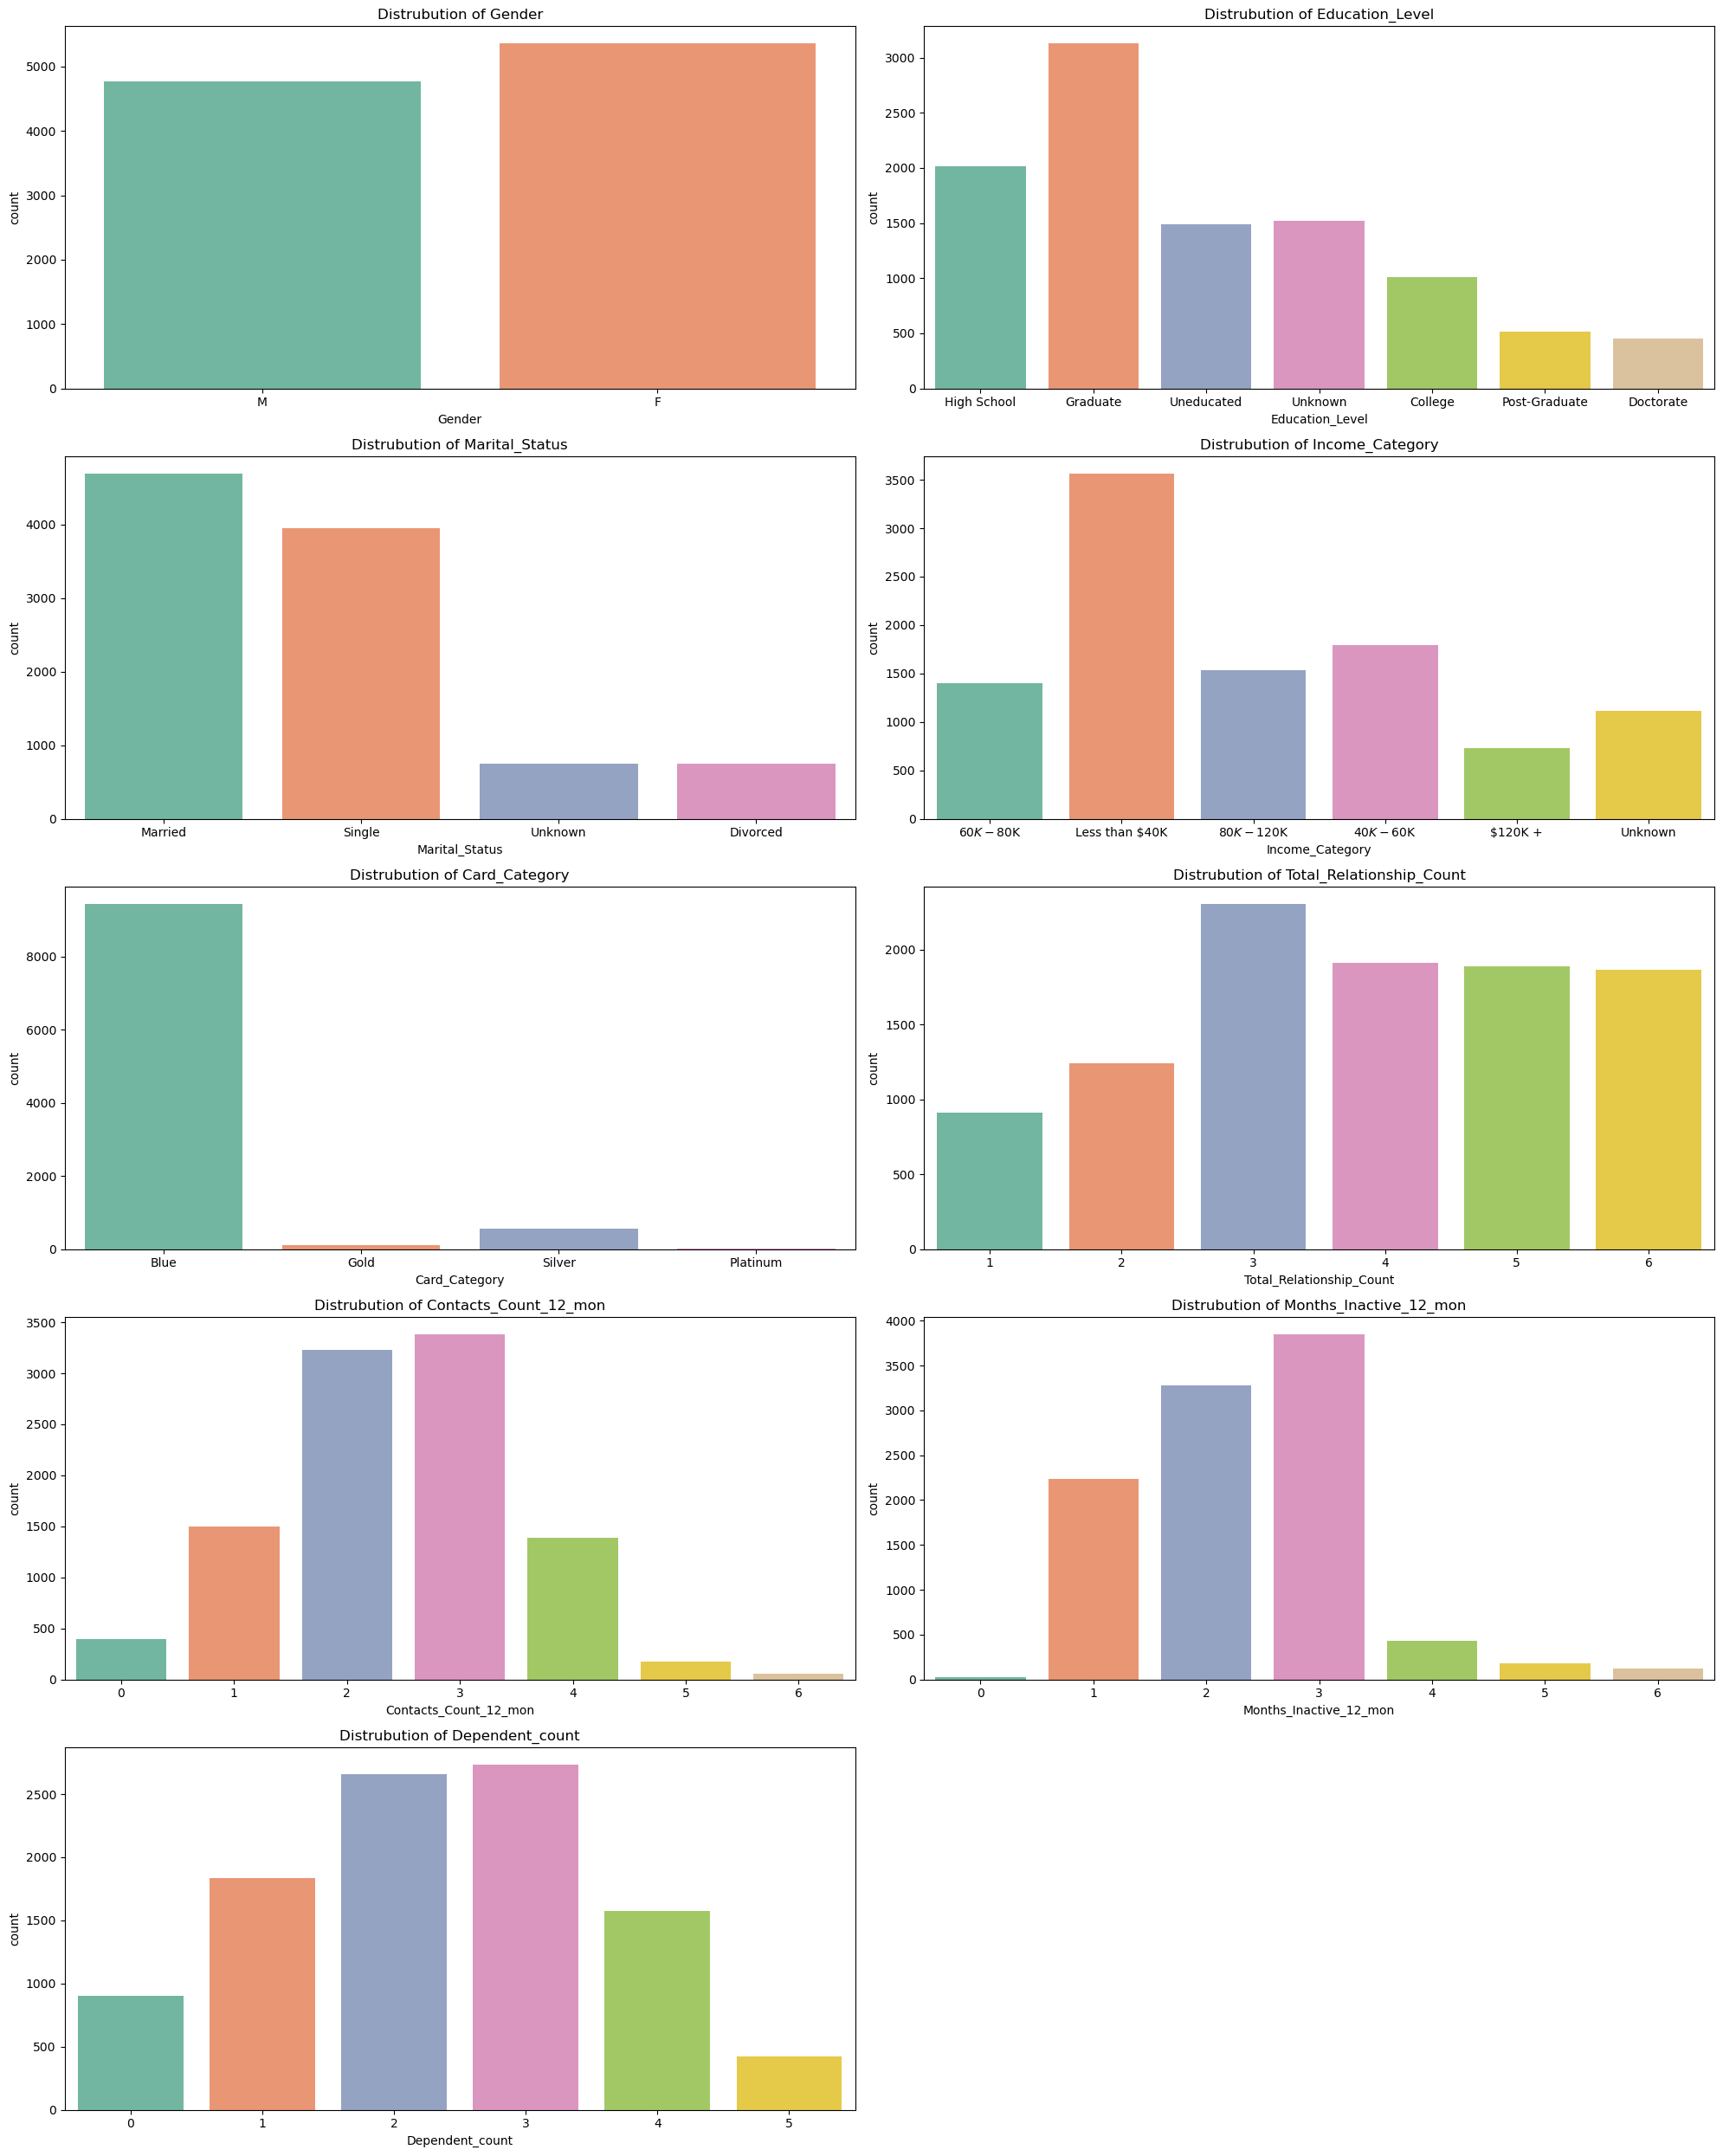

In [89]:
count_plot_cols= [
    'Gender', 
    'Education_Level', 
    'Marital_Status', 
    'Income_Category', 
    'Card_Category', 
    'Total_Relationship_Count', 
    'Contacts_Count_12_mon', 
    'Months_Inactive_12_mon',
    'Dependent_count'
]

plt.figure(figsize=(20,25))

for i,col in enumerate(count_plot_cols):
    plt.subplot(5,2,i+1)
    sns.countplot(data=df,x=col,palette='Set2',hue=col,legend=False)
    plt.title(f"Distrubution of {col}")
plt.tight_layout()
plt.show()

The customer base is predominantly low-income, earning less than $40K per year, with very few high-income individuals. Most customers hold the basic Blue card, while the premium Gold and Silver cards are rare. A large portion of customers are graduates, with the majority being female. In terms of marital status, most are married or single, while smaller segments divorced, or have unknown status.
Most customers have a Total Relationship Count of 3, while counts of 4, 5, and 6 are similar, and 1 is relatively rare. In terms of Months Inactive, most customers were inactive for 1 to 3 months, showing a gradual increase. For Contacts in the last 12 months, 3 contacts is the most common, followed by 2.

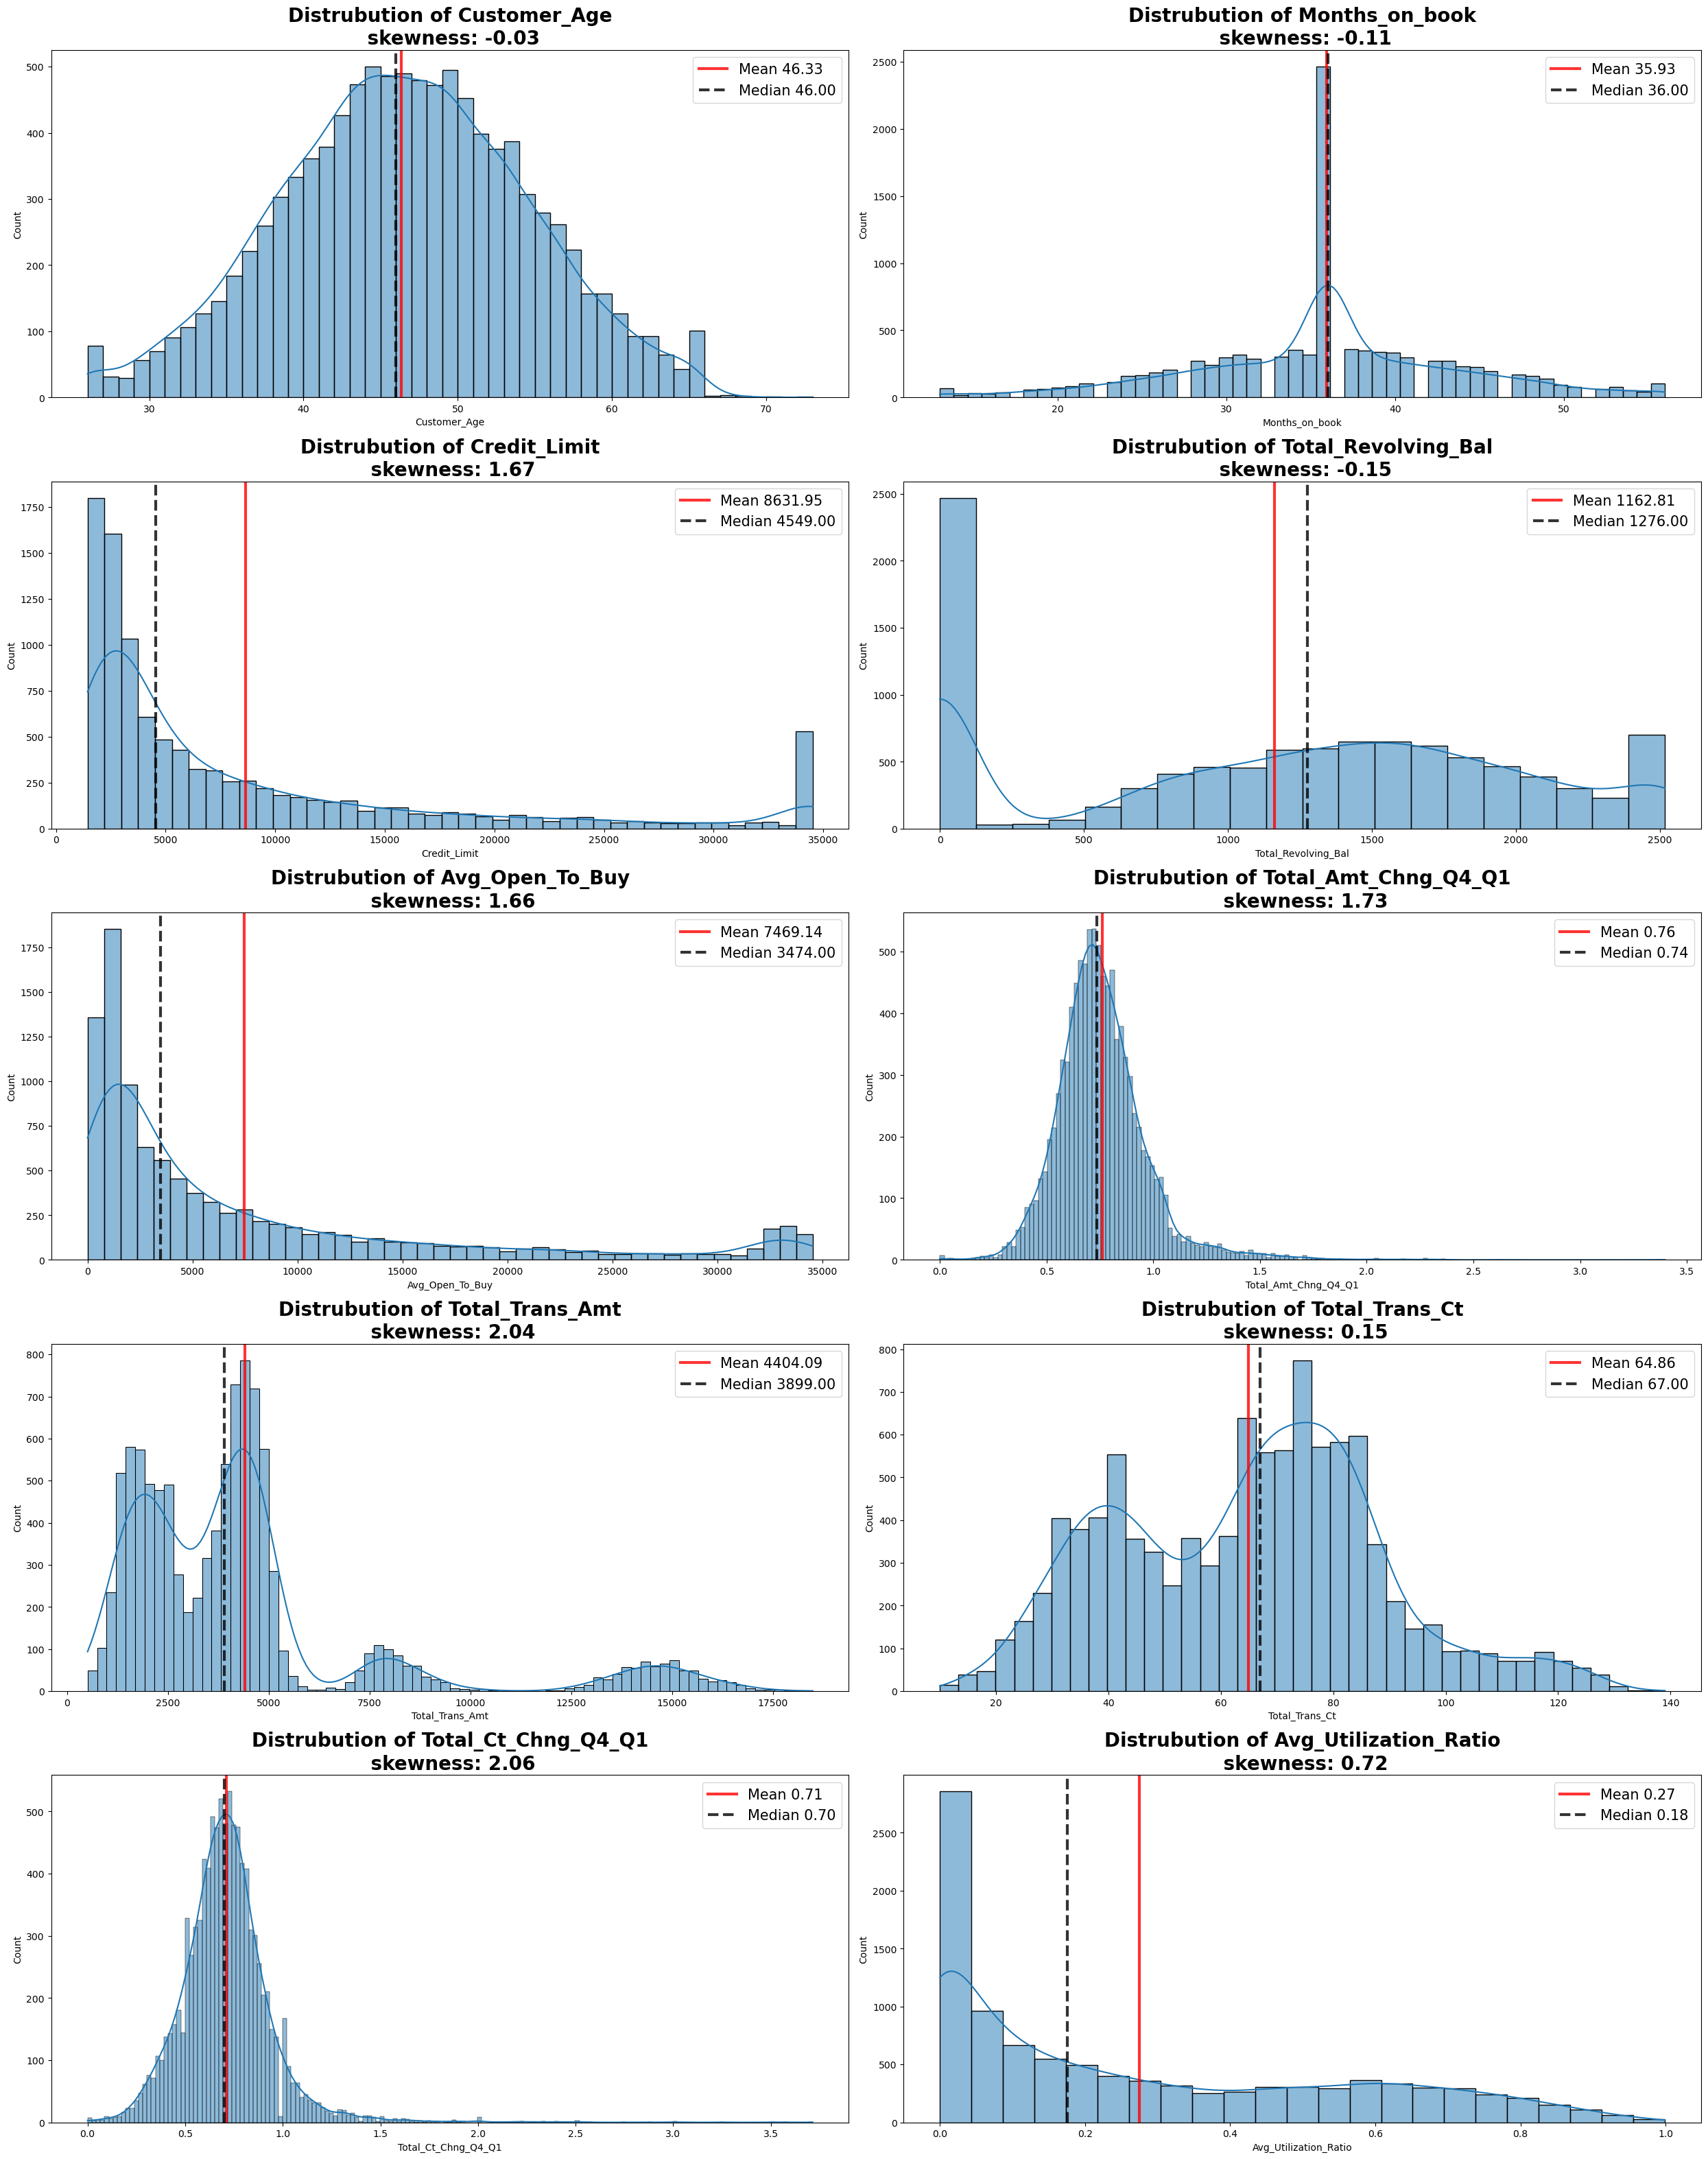

In [90]:
hist_plot_cols  = [
    'Customer_Age',
    'Months_on_book',
    'Credit_Limit',
    'Total_Revolving_Bal',
    'Avg_Open_To_Buy',
    'Total_Amt_Chng_Q4_Q1',
    'Total_Trans_Amt',
    'Total_Trans_Ct',
    'Total_Ct_Chng_Q4_Q1',
    'Avg_Utilization_Ratio'
]
plt.figure(figsize=(25,50))
for i,col in enumerate(hist_plot_cols):
    mean_val = df[col].mean()
    median_val = df[col].median()
    skew_val = df[col].skew()
    plt.subplot(8,2,i+1)
    sns.histplot(data=df, x=col,kde=True)
    plt.title(f"Distrubution of {col}\n skewness: {skew_val:.2f}",fontweight='bold',fontsize=20)

    plt.axvline(mean_val,color='red',linestyle='-',label=f'Mean {mean_val:.2f}',linewidth=3,alpha=0.8)
    plt.axvline(median_val,color='black',linestyle='--',label=f'Median {median_val:.2f}',linewidth=3,alpha=0.8)
    plt.legend(loc='upper right',fontsize=15)
    
plt.tight_layout()
plt.show()
    
    


- Age, Credit Limit, and Months on Book are slightly negatively skewed, so most customers have higher values, with a few lower values pulling the data left.
- Avg_Utilization_Ratio: Most customers use a small portion of their credit limit, with a few using much more.

- Total_Ct_Chng_Q4_Q1: Most customers had a small increase in transaction counts, while a few had a large jump.

- Total_Trans_Amt: Most customers transact moderate amounts, but a few high spenders pull the average up.

- Credit_Limit: Most customers have moderate credit limits, while a small group has very high limits.

### Bivariate EDA Plots

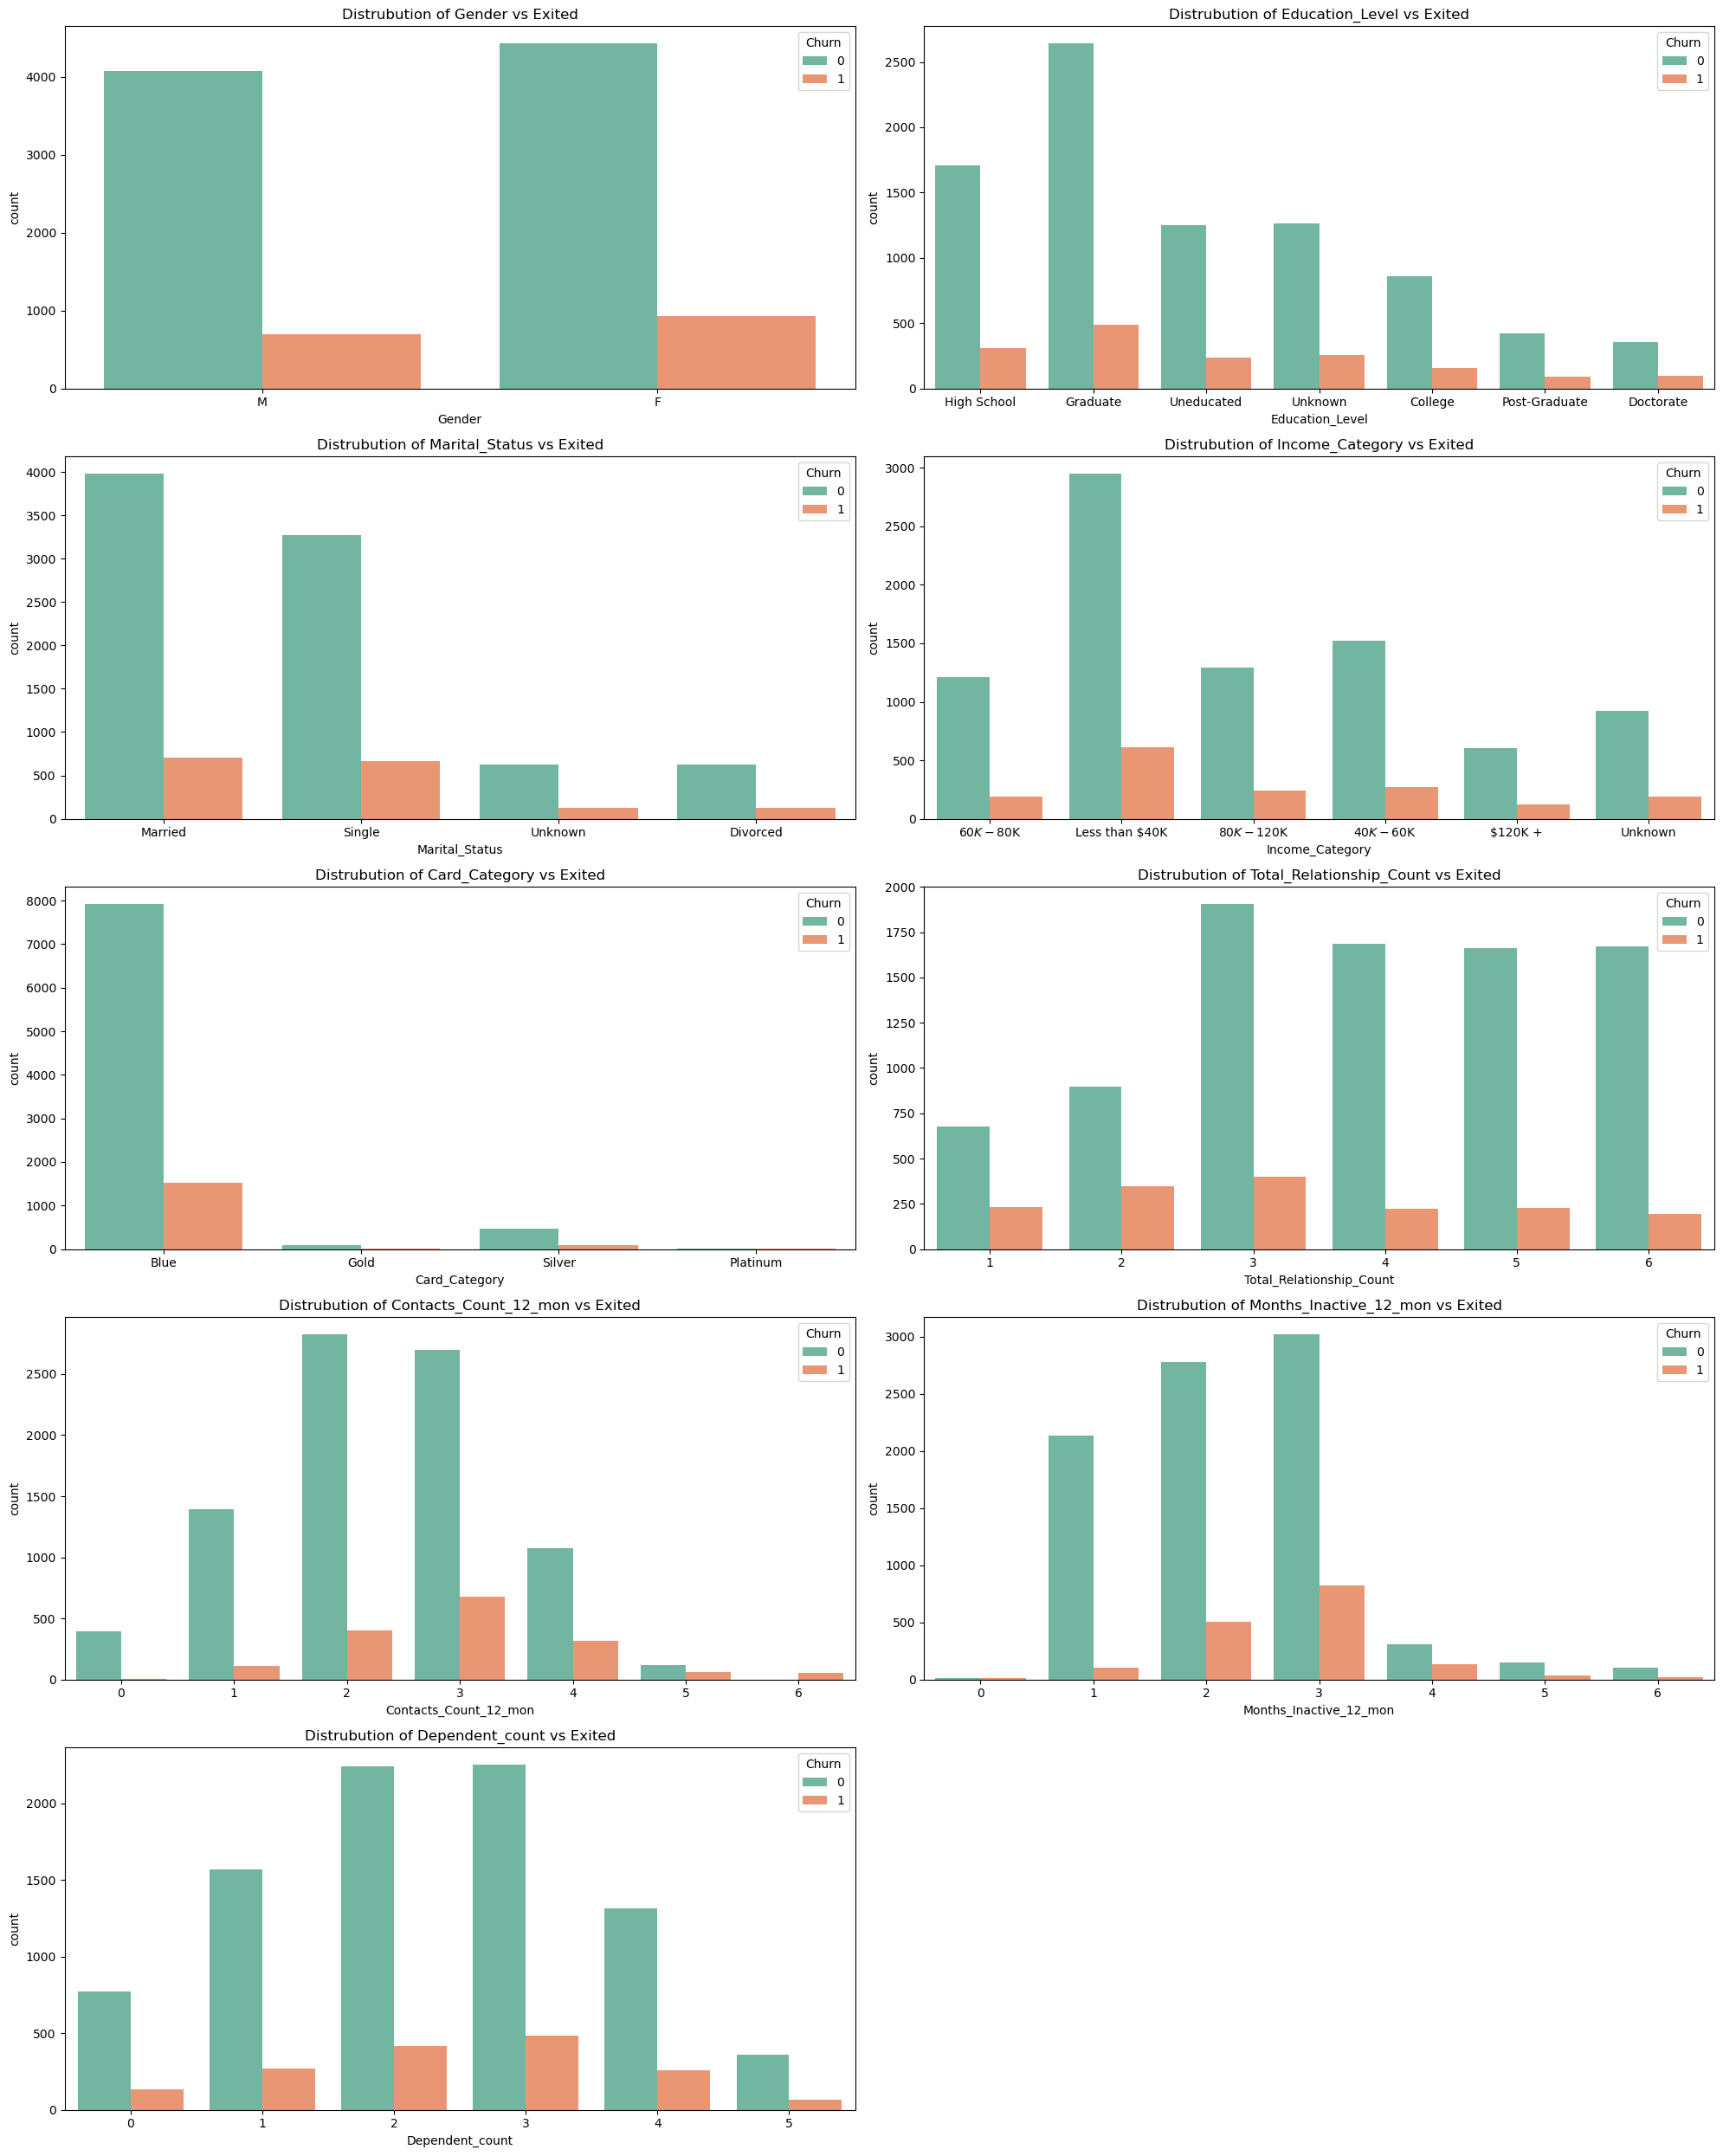

In [91]:
count_plot_cols= [
    'Gender', 
    'Education_Level', 
    'Marital_Status', 
    'Income_Category', 
    'Card_Category', 
    'Total_Relationship_Count', 
    'Contacts_Count_12_mon', 
    'Months_Inactive_12_mon',
    'Dependent_count'
]

plt.figure(figsize=(20,25))

for i,col in enumerate(count_plot_cols):
    plt.subplot(5,2,i+1)
    sns.countplot(data=df,x=col,palette='Set2',hue='Churn',legend=True)
    plt.title(f"Distrubution of {col} vs Exited")
plt.tight_layout()
plt.show()

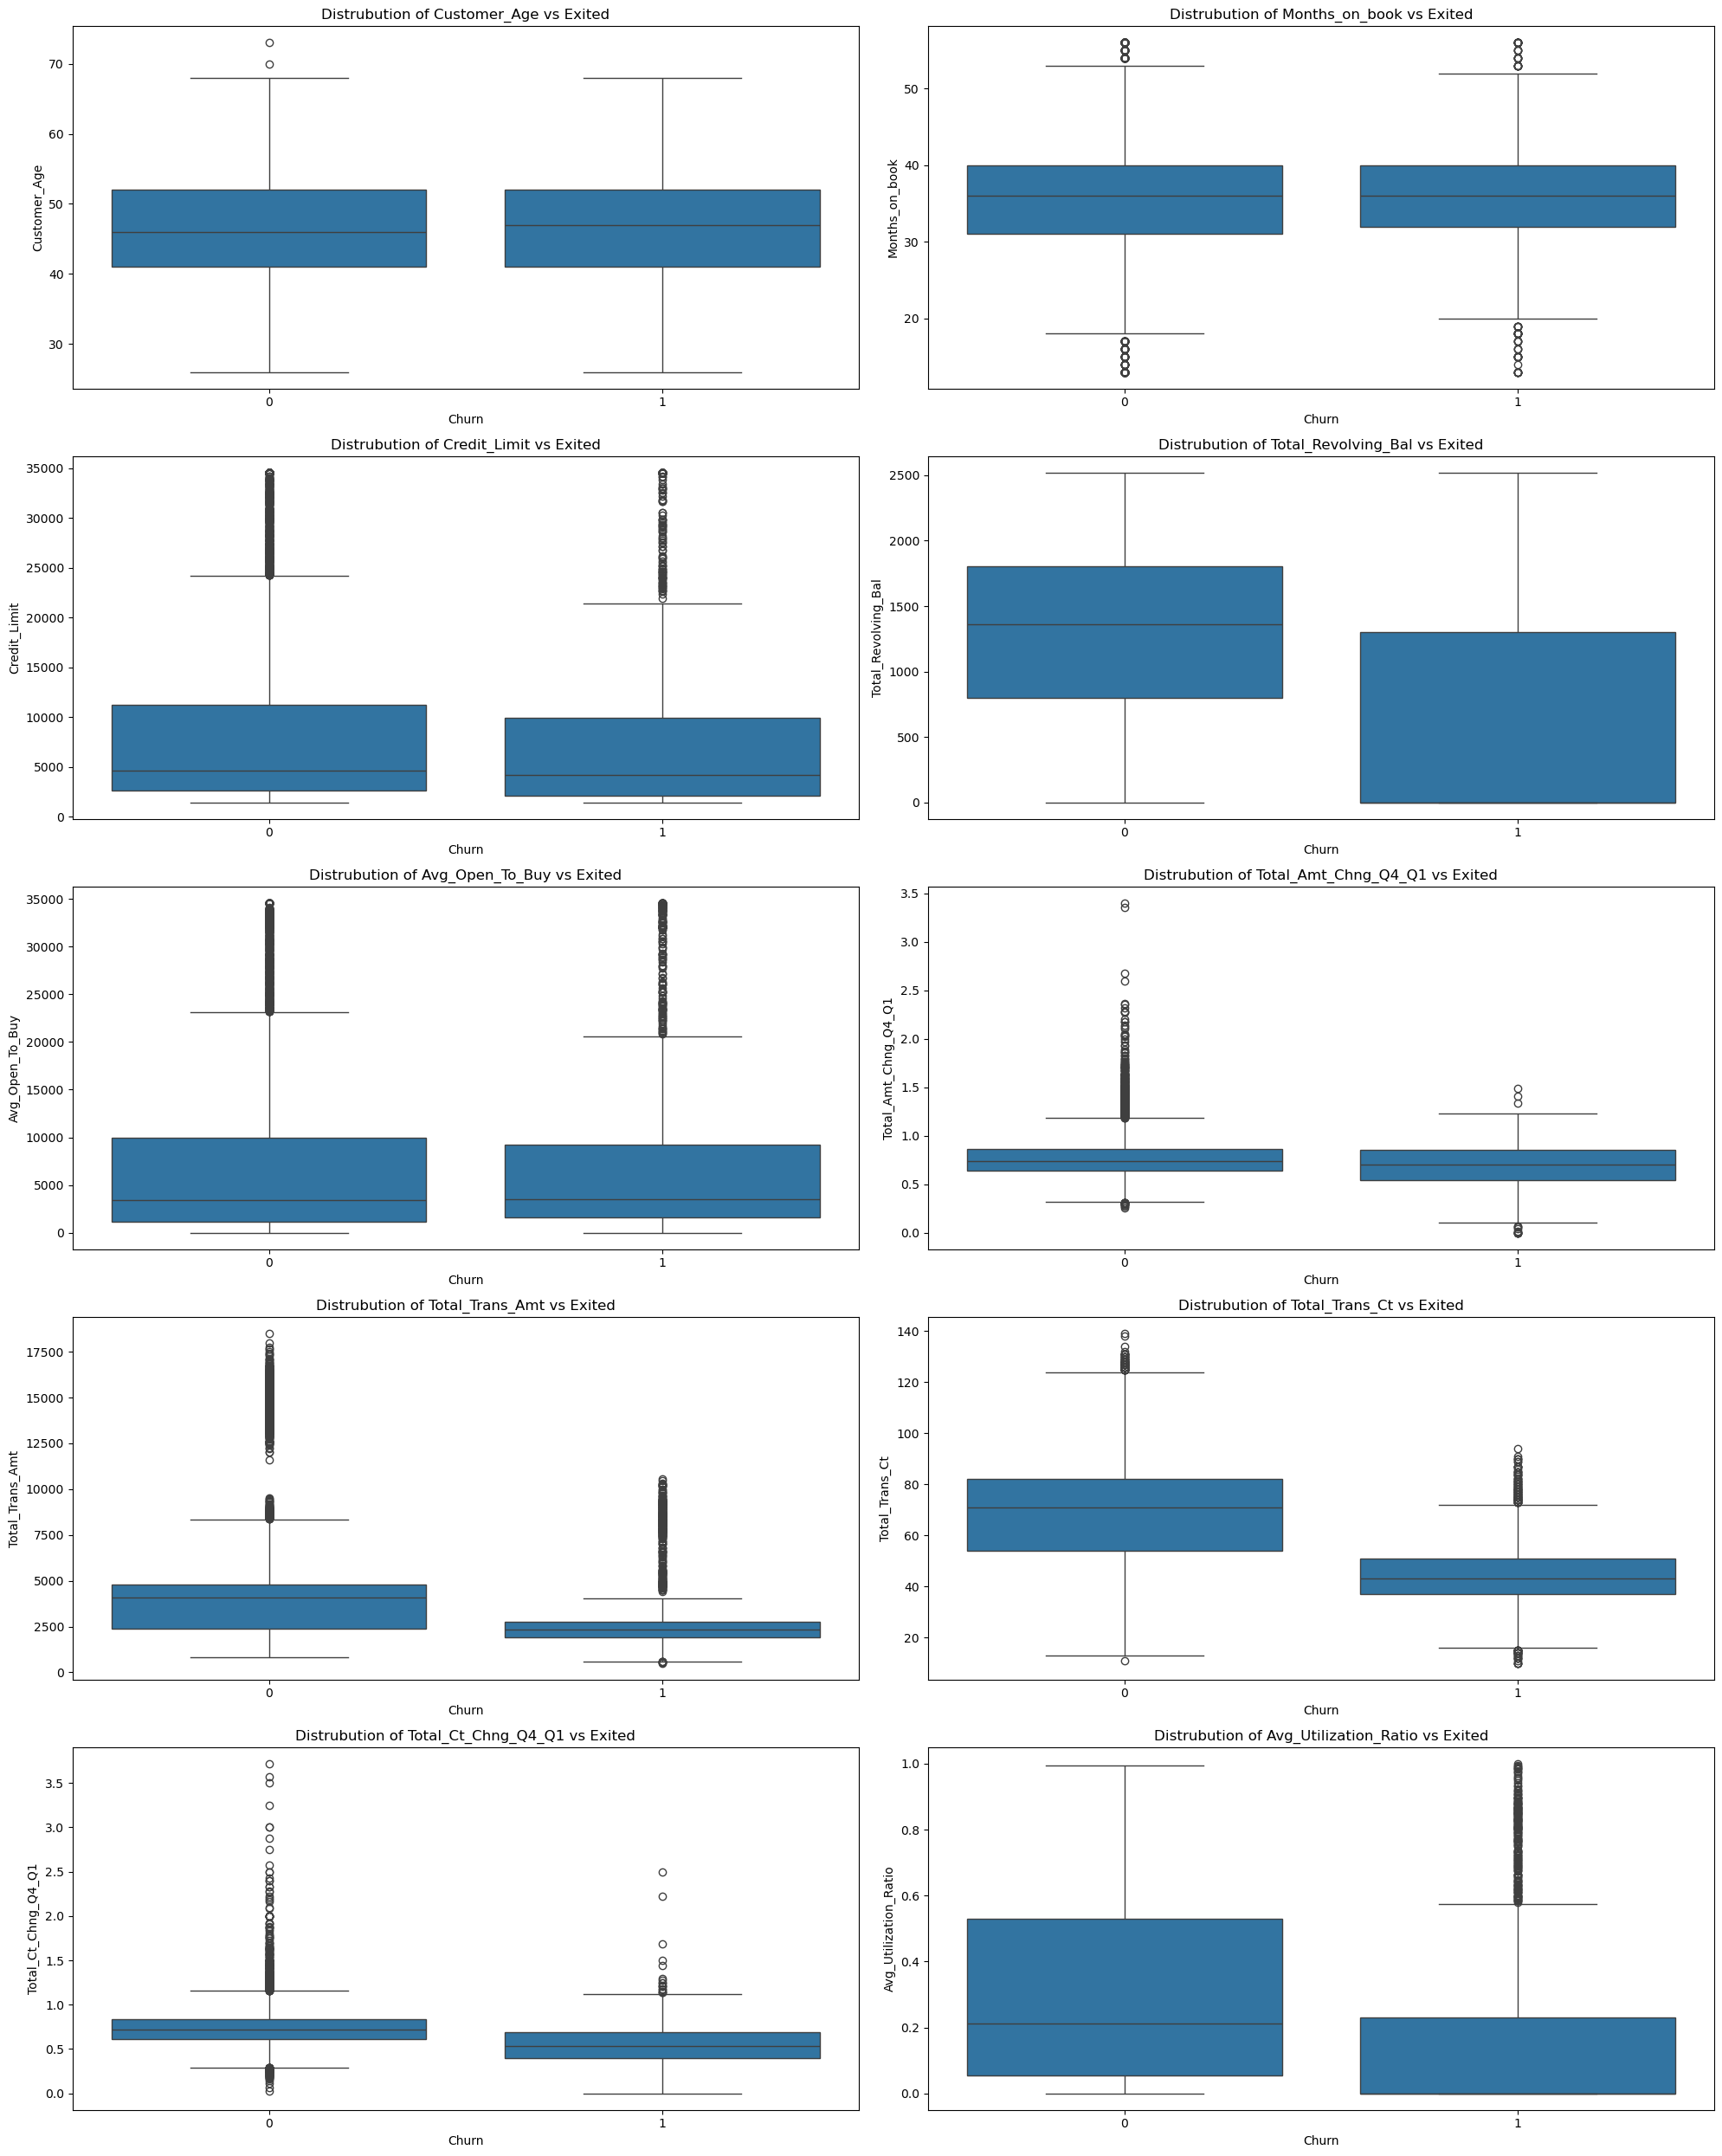

In [92]:
box_plot_cols= [
    'Customer_Age',
    'Months_on_book',
    'Credit_Limit',
    'Total_Revolving_Bal',
    'Avg_Open_To_Buy',
    'Total_Amt_Chng_Q4_Q1',
    'Total_Trans_Amt',
    'Total_Trans_Ct',
    'Total_Ct_Chng_Q4_Q1',
    'Avg_Utilization_Ratio'
]
plt.figure(figsize=(20,25))
for i,col in enumerate(box_plot_cols):
    plt.subplot(5,2,i+1)
    sns.boxplot(data=df,x='Churn',y=col)
    plt.title(f"Distrubution of {col} vs Exited")
plt.tight_layout()
plt.show()

Several noticeable patterns and differences can be observed in customer behavior:
- Total Transaction Count: Customers who use their cards frequently are much less likely to churn.
- Credit Limit: Customers with higher credit limits tend to stay, while those who left had little or no increase.
- Total Transaction Amount: Higher-spending customers are generally more loyal and less likely to churn.


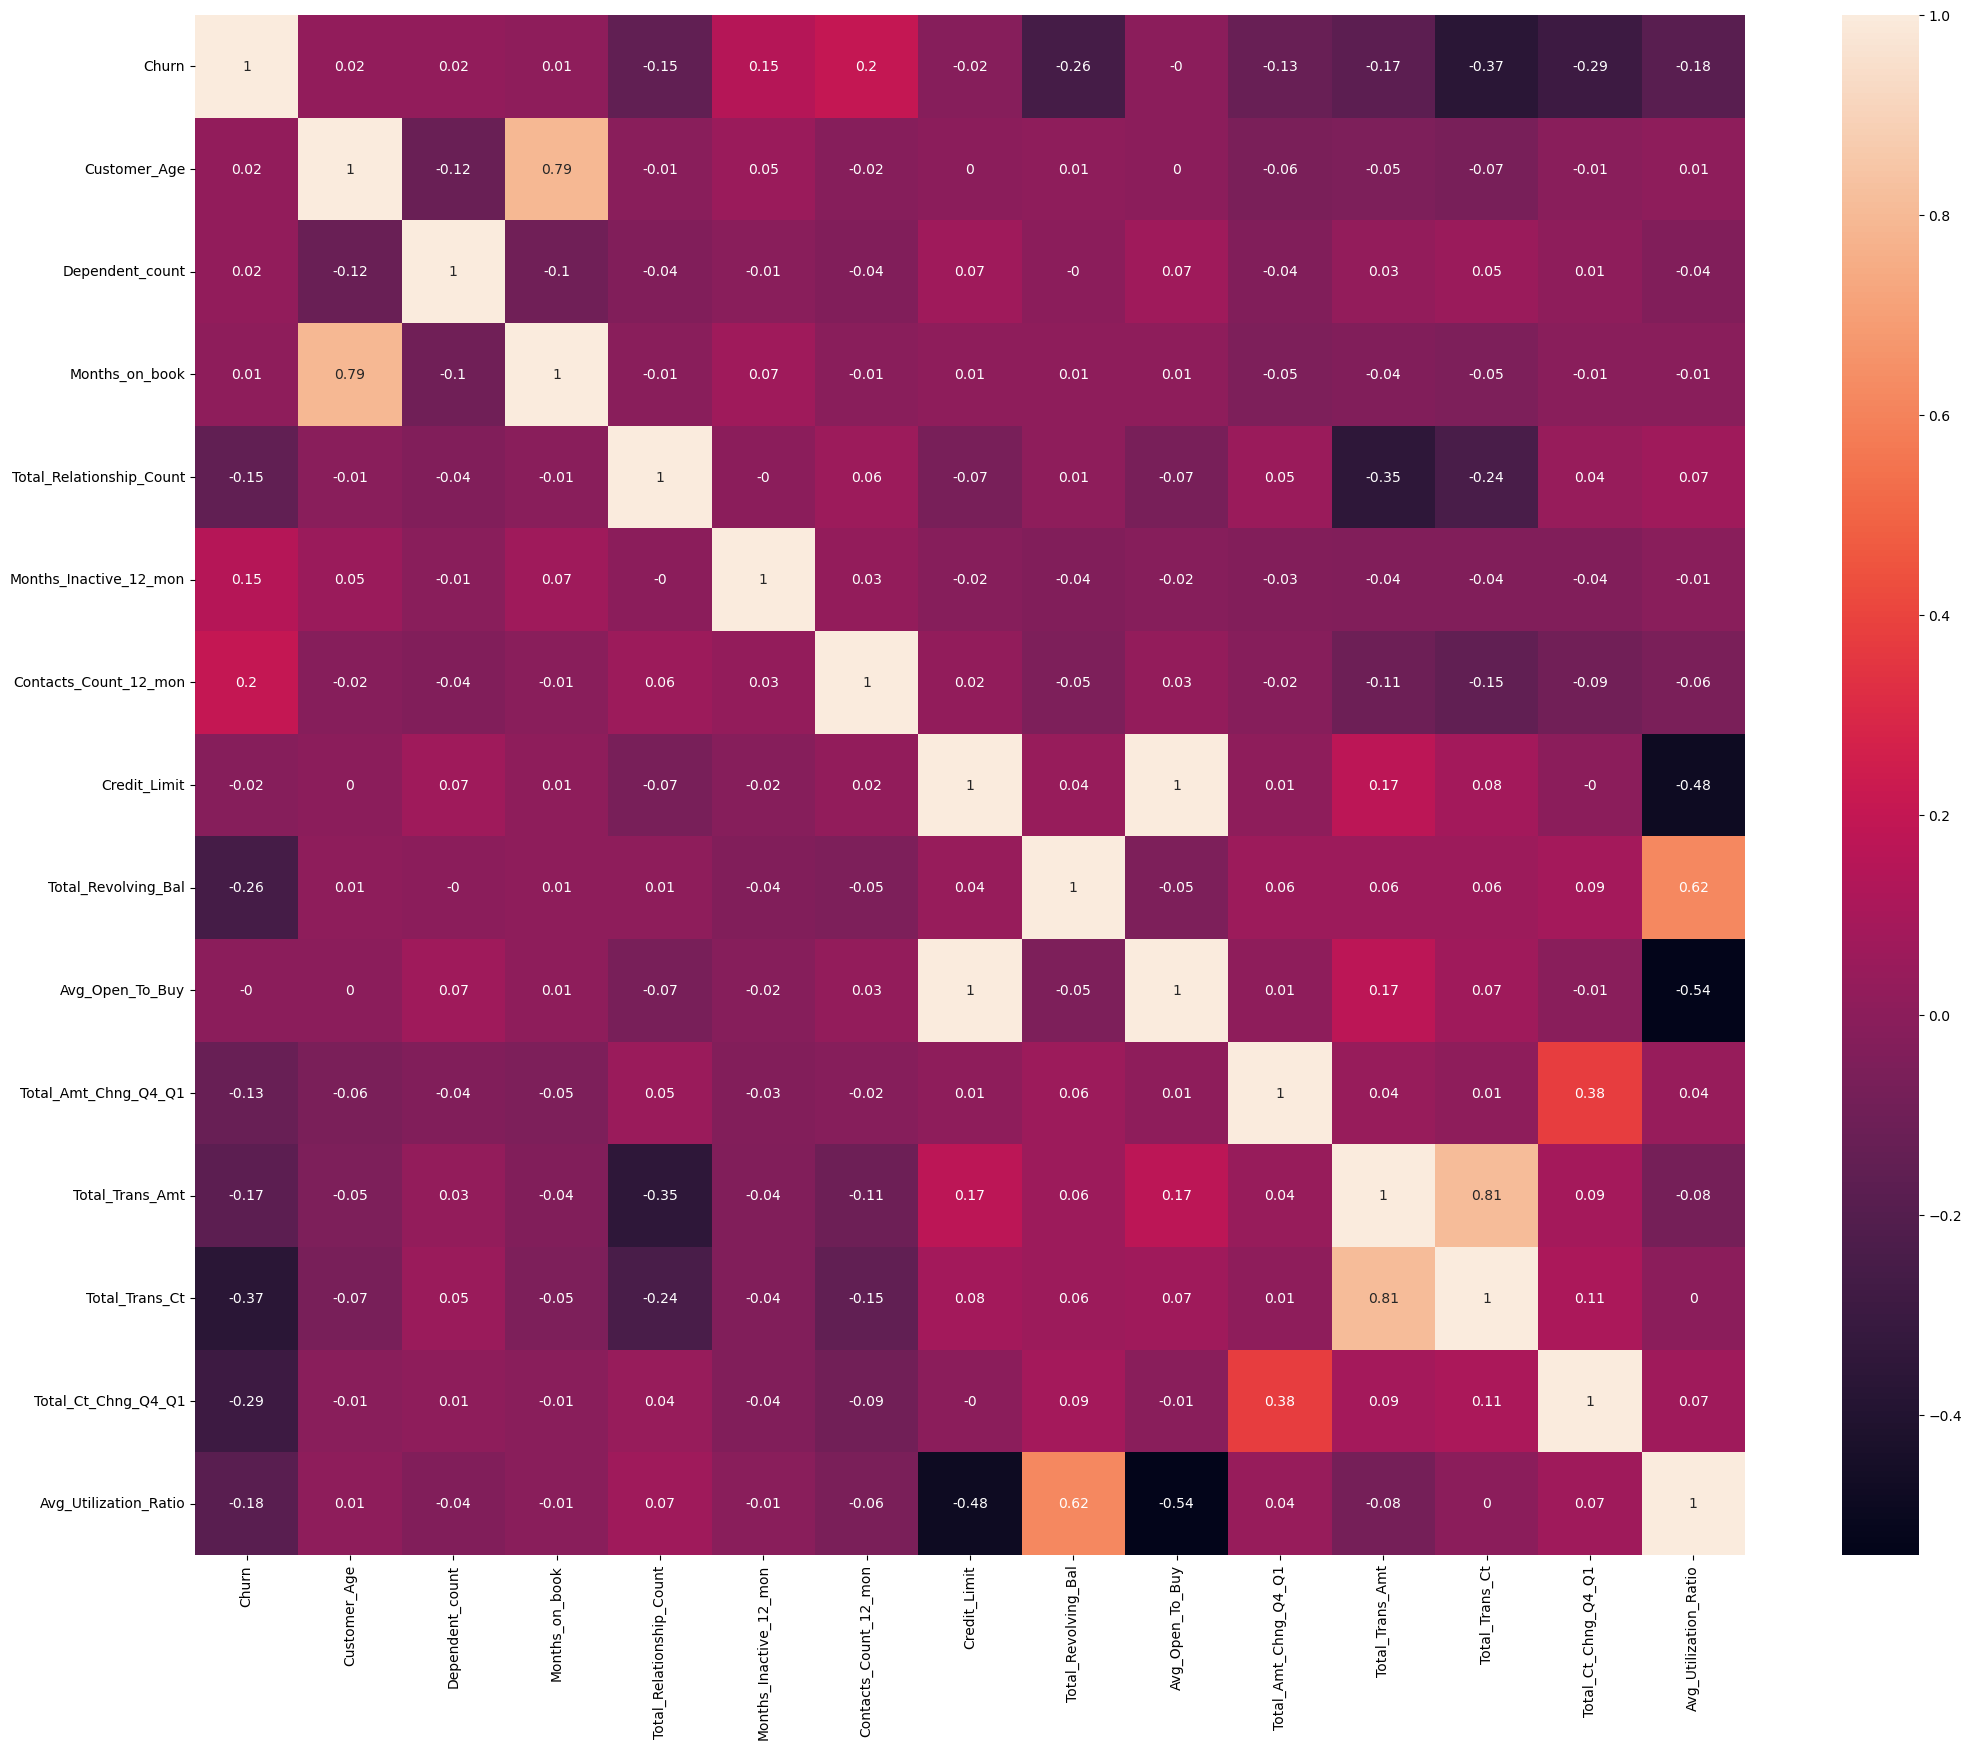

In [93]:
num_cols.remove('IDs')
corr = df[num_cols].corr()

plt.figure(figsize=(25,20))
sns.heatmap(corr.round(2),annot=True)

The correlations show some interesting patterns. Customers with more relationships don’t necessarily spend more, as seen in the negative link between total transaction amount and relationship count. Those with higher credit limits usually use a smaller share of their available credit, which explains the strong negative correlation between credit limit and utilization ratio. Similarly, the more a customer uses their credit, the less open-to-buy balance they have, showing another strong negative relationship.

In [94]:
df.to_csv('../datasets/processed/CreditCard_cleaned.csv')